# Sprint 7

## K-Means Clustering

### [Problem 1-7] Implement ScratchKMeans and Estimate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        self.min_sse = np.inf
        n_samples, n_features = X.shape
        self.selected_centers = np.zeros([self.n_clusters, n_features])
        self.clusters = np.zeros([n_samples, ])
        
        for _ in range(self.n_init):
            #Initialize center points
            centers = self._init_center_point(X)

            for i in range(self.max_iter):
                # Assign cluster to every data point
                y = self._assign_cluster(X, centers)
                # Create the new centers
                new_centers = self._move_centers(X, y)
                # Check if condition is met
                if np.sum(np.linalg.norm(new_centers - centers, axis=1)) <= self.tol:
                    sse = self._calculate_sse(X, y, centers)
                    if sse < self.min_sse:
                        self.min_sse = sse
                        self.selected_centers = centers
                        self.clusters = y
                    break
                # Move the previous centers to the new centers
                centers = new_centers
                
        if self.verbose:
            print("Smallest error: ", self.min_sse)
            print("Centers:\n", self.selected_centers)
            self._verbose(X, self.clusters, self.selected_centers)
    
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        return self._assign_cluster(X, self.selected_centers)
    
    def plot(self, X):
        self._verbose(X, self.clusters, self.selected_centers)
        return
    
    def _verbose(self, X, y, centers):
        colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
        for k in range(self.n_clusters):
            indices = np.where(y == k)
            plt.plot(X[indices, 0], X[indices, 1], marker='o', linestyle='none', color=colors[k % 7])
        plt.plot(centers[:, 0], centers[:, 1], marker='D', linestyle='none', color='orange')
        plt.show()
    
    def _init_center_point(self, X):
        n_samples = X.shape[0]
        selected_points = np.random.randint(0, n_samples, size=self.n_clusters)
        return X[selected_points]
    
    def _calculate_sse(self, X, y, centers):
        sse = 0
        n_samples = X.shape[0]
        for n in range(n_samples):
            for k in range(self.n_clusters):
                sse += (y[n] == k) * (np.linalg.norm(X[n] - centers[k], 2) ** 2)
        return sse
    
    def _assign_cluster(self, X, centers):
        n_samples = X.shape[0]
        dist_table = np.zeros((n_samples, self.n_clusters))
        for k in range(self.n_clusters):
            dist_table[:, k] = np.linalg.norm(X - centers[k], axis=1)
        y = np.argmin(dist_table, axis=1)
        return y
            
    def _move_centers(self, X, y):
        n_features = X.shape[1]
        center = np.zeros([self.n_clusters, n_features])
        for k in range(self.n_clusters):
            indices = np.where(y == k)
            center[k] = np.mean(X[indices], axis=0)
        return center

In [14]:
km = ScratchKMeans(n_clusters=4, n_init=7, max_iter=5, tol=1e-5, verbose=True)

Smallest error:  48.633783207064035
Centers:
 [[ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]
 [ 0.92578447  4.32475792]
 [-1.47935679  3.11716896]]


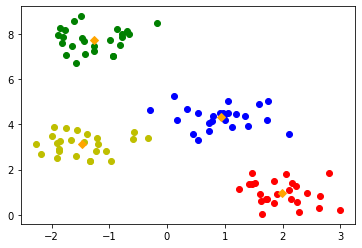

In [15]:
km.fit(X)

In [16]:
km_predict = km.predict(X)
print(km_predict)

[2 1 2 2 2 2 3 1 2 1 1 1 1 1 1 0 0 3 3 0 2 1 3 0 2 3 3 2 0 0 0 1 0 0 3 2 1
 0 1 3 2 3 1 3 3 1 0 3 2 2 2 0 3 3 3 1 1 0 0 1 1 0 0 2 0 1 3 3 0 2 1 0 2 1
 2 2 3 3 0 0 0 1 3 2 0 3 0 0 2 2 2 3 2 3 3 1 1 3 1 2]


### [Problem 8] Implementation of elbow method

In [17]:
def elbow(X, max_clusters=10, n_init=5, max_iter=5, tol=1e-5, verbose=False):
    sse = np.zeros([max_clusters-1, ])
    for i in range(2, max_clusters+1):
        if verbose:
            print(i, " clusters")
        km = ScratchKMeans(n_clusters=i, n_init=n_init, max_iter=max_iter, tol=tol, verbose=verbose)
        km.fit(X)
        sse[i-2] = km.min_sse
    # Plot the graph
    plt.plot(np.arange(2, max_clusters+1), sse)
    plt.title('SSE for each number of clusters')
    plt.show()

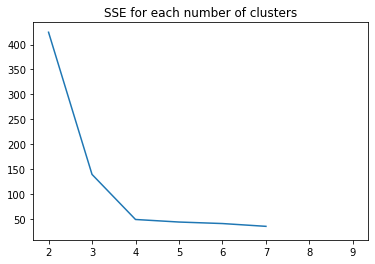

In [18]:
elbow(X)

### Wholesaler data analysis

In [19]:
import pandas as pd

df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
data = df.iloc[:, (df.columns != "Channel") & (df.columns != "Region")]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
data_pca[:20]

array([[   650.02212207,   1585.51909007],
       [ -4426.80497937,   4042.45150884],
       [ -4841.9987068 ,   2578.762176  ],
       [   990.34643689,  -6279.80599663],
       [ 10657.99873116,  -2159.72581518],
       [ -2765.96159271,   -959.87072713],
       [  -715.55089221,  -2013.00226567],
       [ -4474.58366697,   1429.49697204],
       [ -6712.09539718,  -2205.90915598],
       [ -4823.63435407,  13480.55920489],
       [ -7974.82898455,   5711.21892518],
       [    36.39377903,  -6037.89640947],
       [ 19940.20205019,   4591.28647966],
       [  9396.69557902,   5913.15703681],
       [ 12660.37043259,   4541.94543497],
       [ -2997.72589991,  -6093.8792994 ],
       [-10589.52355862,   6584.21594303],
       [ -6367.09518029,  -3680.71267259],
       [  6623.82533598,   1254.71952554],
       [ -4861.53156911,   -225.59226591]])

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


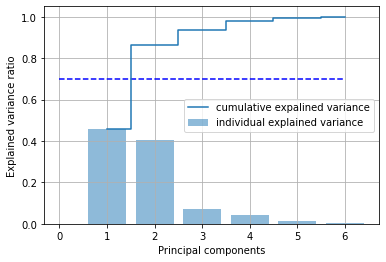

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### [Problem 10] Selection of the number of clusters k

2  clusters
Smallest error:  91919932364.82265
Centers:
 [[-4175.31101293  -211.15109304]
 [24088.33276689  1218.17938291]]


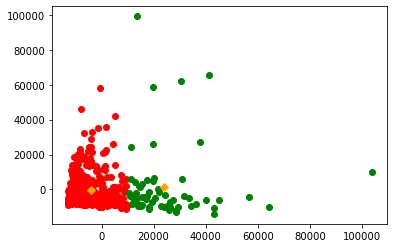

3  clusters
Smallest error:  59085149481.990555
Centers:
 [[-1341.31124554 25261.39189714]
 [23978.86566553 -4445.56611772]
 [-4165.1217824  -3105.15811456]]


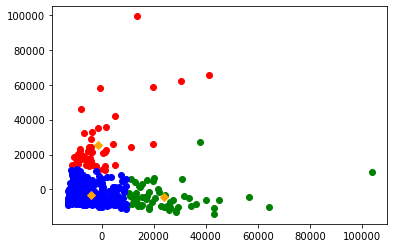

4  clusters
Smallest error:  43987034372.52692
Centers:
 [[23984.5576181  -4910.93673404]
 [14526.87614929 50607.64137279]
 [-3496.78818727 -5024.80811368]
 [-6166.17305058 11736.81384052]]


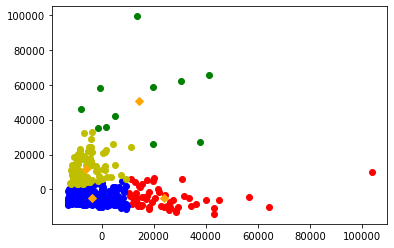

5  clusters
Smallest error:  32044670443.780148
Centers:
 [[14537.71774395 61715.67085248]
 [ 9052.39957144 -4808.55909102]
 [-6399.7117556  -4169.29690862]
 [-5607.91709853 14199.18040025]
 [37704.64157991 -5488.35405895]]


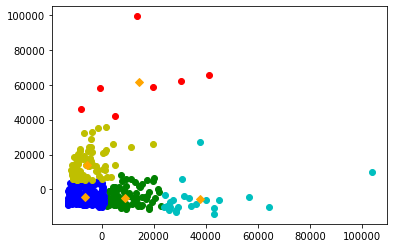

6  clusters
Smallest error:  26535916698.192562
Centers:
 [[-7177.17913696  6446.09370654]
 [-2787.06628956 24275.2601508 ]
 [37704.64157991 -5488.35405895]
 [20964.64986166 68819.21772923]
 [-6035.6523743  -5702.59417982]
 [ 9351.85448379 -4667.83404401]]


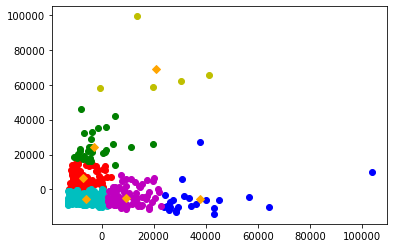

7  clusters
Smallest error:  21760570662.547955
Centers:
 [[20964.64986166 68819.21772923]
 [ 3477.09902714 -5484.93607232]
 [-2787.06628956 24275.2601508 ]
 [54314.5101146  -1754.26873721]
 [20026.97343588 -4765.30279326]
 [-7819.72184944 -5373.09999267]
 [-7012.62228466  6928.39601904]]


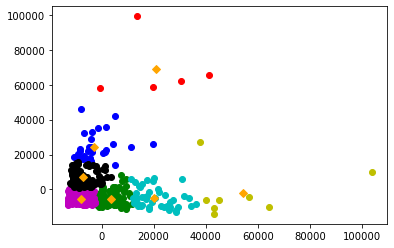

8  clusters
Smallest error:  18312359085.613495
Centers:
 [[-2787.06628956 24275.2601508 ]
 [31677.01702205 -6255.39517189]
 [-7012.62228466  6928.39601904]
 [74982.98228094 -1461.38586695]
 [14389.27388383 -2507.41605083]
 [ 2900.14423445 -6032.43569237]
 [20964.64986166 68819.21772923]
 [-7855.70387893 -5357.47365718]]


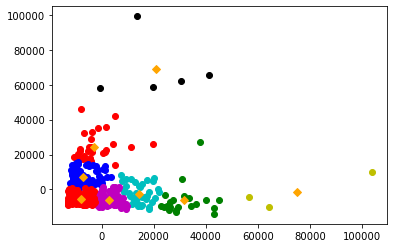

9  clusters
Smallest error:  16695446611.759323
Centers:
 [[20964.64986166 68819.21772923]
 [-7815.49738167 -5816.65149987]
 [  852.9010538  29627.10876987]
 [31364.98491194 -7934.73743858]
 [-7316.11032573  4072.33845324]
 [65716.6515168   5736.82314024]
 [14389.27388383 -2507.41605083]
 [ 2900.14423445 -6032.43569237]
 [-6596.84480809 15112.1858082 ]]


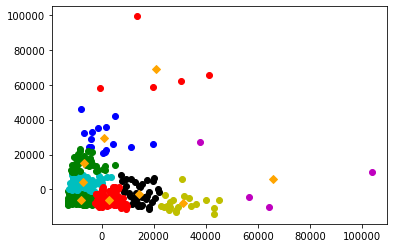

10  clusters
Smallest error:  15235418435.618898
Centers:
 [[  5025.10884464  -6229.39369869]
 [ -7024.3186198    4746.02280458]
 [ 31364.98491194  -7934.73743858]
 [ -6367.65105184  15394.53959489]
 [ -3246.38801366  -6036.65592282]
 [-10138.15045503  -4958.90652502]
 [ 14538.25117084  -2533.87200218]
 [ 20964.64986166  68819.21772923]
 [   852.9010538   29627.10876987]
 [ 65716.6515168    5736.82314024]]


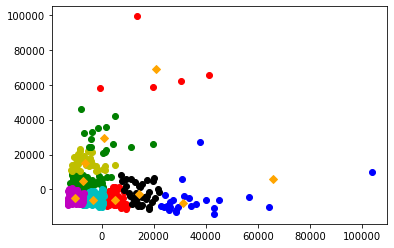

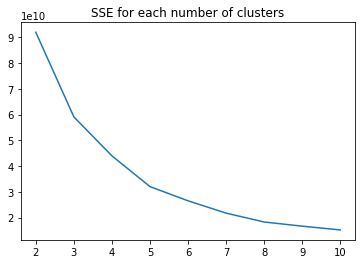

In [23]:
elbow(data_pca, max_clusters=10, max_iter=50, n_init=20, verbose=True)

From the above diagram, when the number of clusters increase, the loss function gives a smaller amount. However, the change of the slope at `n_clusters = 3` and `n_clusters = 5` can be seen easier than other values. And based on the number of features, I will choose `n_clusters = 5` as the hyperparameters.

### [Problem 11] Comparison with known groups

In [24]:
km5 = ScratchKMeans(n_clusters=5, max_iter=50, n_init=20, tol=1e-5)
km5.fit(data_pca)
clusters_pred = km5.predict(data_pca)
clusters_pred

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 4, 1, 3, 3, 3, 1, 4, 1, 3, 1, 3, 1,
       3, 4, 3, 3, 1, 1, 4, 0, 3, 1, 3, 3, 1, 1, 3, 4, 4, 0, 3, 3, 4, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 0, 4, 3, 1, 4, 4, 1, 1, 1, 2, 1, 4, 1, 2,
       1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 4, 1, 1, 1, 4, 1, 3, 1, 2, 2, 0,
       1, 3, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 4, 1, 0, 1, 3, 1, 4, 1, 4,
       1, 4, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 0, 3, 3, 1, 0, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 4, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 4, 4, 3, 1, 4, 1, 1, 3, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       0, 1, 1, 1, 1, 0, 4, 0, 1, 1, 1, 1, 4, 4, 3, 1, 1, 4, 1, 3, 3, 1,
       1, 1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 3, 2, 1, 1, 4, 4, 4, 3, 4, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 0, 3, 3,
       3, 1, 1, 4, 1, 1, 3, 1, 1, 4, 1, 3, 1, 3, 1, 1, 0, 0, 1, 1, 3, 1,
       4, 4, 4, 3, 4, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 0, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 3,

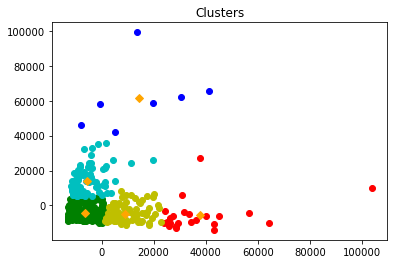

In [25]:
plt.title('Clusters')
km5.plot(data_pca)

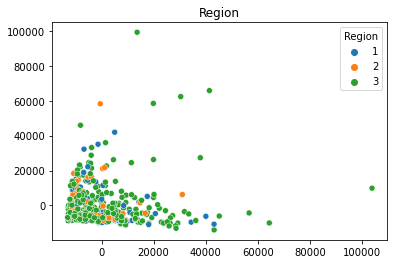

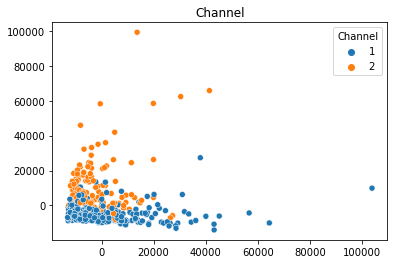

In [26]:
import seaborn as sns

plt.title('Region')
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Region'], palette='tab10')
plt.show()

plt.title('Channel')
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Channel'], palette='tab10')
plt.show()

### [Problem 12] Useful information for wholesalers

In [27]:
clusters = pd.DataFrame(clusters_pred, columns=['Cluster'])
df_cl = pd.concat([df, clusters], axis=1)
df_cl

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,3
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,1


In [28]:
df_cl.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.977273
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,1.299880
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,4.000000


In [29]:
df_cl.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.086957,2.695652,49330.739130,6823.260870,6338.521739,9666.086957,950.913043,4557.695652
1,1.171806,2.537445,6123.211454,3290.273128,4144.189427,2428.193833,1245.414097,996.233480
2,2.000000,2.571429,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
3,1.203883,2.543689,21480.388350,3911.601942,5154.563107,4188.650485,1131.912621,1712.135922
4,1.912500,2.512500,5035.700000,12213.087500,18603.025000,1609.337500,8164.725000,1822.300000


- In cluster 0, the money spent on `Fresh` and `Frozen` are highest among all.
- Cluster 1 spent the least amount of money on `Delicassen`.
- Cluster 2 spent the most on `Milk`, `Grocery` and `Detergents_Paper`.
- Cluster 3 is in average in all categories.
- Cluster 4 spent the least on `Fresh` and `Frozen` products.

In [32]:
df_cl.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Channel,,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,1.550336
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,2.873239


- The highest distinction between the 2 channel is `Detergents_Paper`, where Channel 2 spent 10 times greater amount than Channel 1.
- The smallest distinction is `Delicassen`.
- The money spent on `Fresh`, `Frozen` products of channel 1 is twice higher than channel 2.
- The money spent on `Milk`, `Grocery` products of channel 2 is 3 times higher than channel 1.

In [33]:
df_cl.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Region,,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,1.987013
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,2.170213
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,1.946203


- There is no big difference between all categories from different regions. It may be difficult to know a data point from which region from there records.